# Desafío 24/06

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo

## Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías básicas para el análisis de datos
* Descarge e importe el archivo `nations.csv`. _warning_: va a encontrar un error en el formato ¿Cómo lo podemos solucionar?.
__Respuesta: El problema se debe al encoding del archivo que es distinto al utilizado por defecto por read_csv, para solucionarlo hay que indicarle el encoding correcto "ISO-8859-1"__

* La base de datos contiene información a nivel mundial sobre demografía:
    * `country`: País.
    * `region`: Continente del país.
    * `gdp`: Producto Interno Bruto per cápita, precios 2005.
    * `school`: Promedio años de escolaridad.
    * `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
    * `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
    * `life`: Esperanza de vida al nacer.
    * `pop`: Población total.
    * `urban`: Porcentaje de población urbana.
    * `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
    * `literacy`: Tasa de alfabetismo.
    * `co2`: Toneladas de Co2 mitidas per cápita.
    * `gini`: Coeficiente de desigualdad del ingreso.


* Apellidos desde la A hasta la N: Enfocarse en las variables `chldmort`, `adfert` y `life`.
* Apellidos desde la M hasta la Z: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [30]:
#importamos librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from seaborn import distplot

df = pd.read_csv("nations.csv", encoding="ISO-8859-1",  index_col=0)
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


## Ejercicio 2: A continuación se presenta una serie de gráficos construídos con `matplotlib`. Se le pide refactorizarlos utilizando `seaborn`.
* Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

### binarize_histogram

94.47124986648558


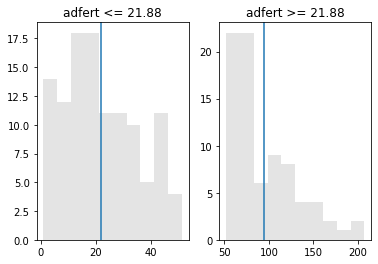

In [31]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    print(np.mean(tmp[tmp['binarize'] == 1][variable].dropna()))
       
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    
binarize_histogram(df, 'adfert')

### Refactorización: binarize_histogram 

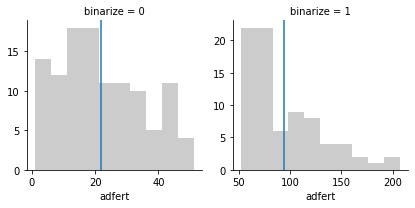

In [16]:
def binarize_histogram(dataframe, variable):
    
    dataframe['binarize'] = np.where(dataframe[variable] > np.mean(dataframe[variable]), 1, 0)
    
    def distplot_avg(col, color):
        plt.axvline(np.mean(col))
        sns.distplot(col, color=color, kde=False, bins=10)
        
    grid = sns.FacetGrid(dataframe, col="binarize", col_wrap = 2, sharex=False, sharey=False)
    grid = grid.map(distplot_avg, variable, color='grey')
    
    
binarize_histogram(df, 'adfert')

### grouped_boxplot

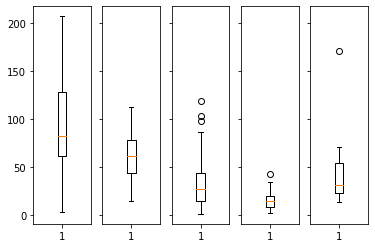

In [32]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
        
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
      #  ax[i].set_title(n)
    
grouped_boxplot(df, 'adfert', 'region')

### Refactorización: grouped_boxplot

/home/danielf/Documents/Data Science/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


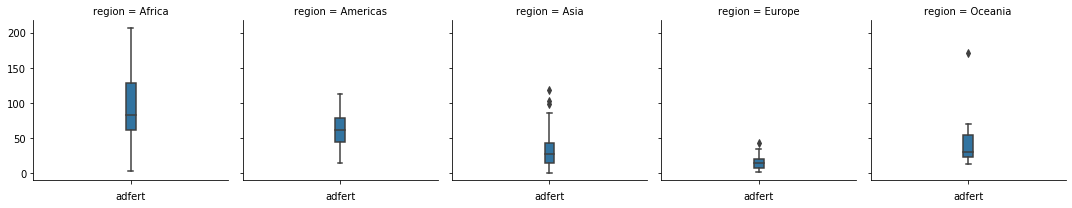

In [40]:
def gropuped_boxplot(dataframe, variable, group_by):
     
    grid = sns.FacetGrid(dataframe, col=group_by)
    grid = grid.map(sns.boxplot,variable, orient = "v", width=0.05)
    
gropuped_boxplot(df, 'adfert', 'region')

### grouped_scatterplot

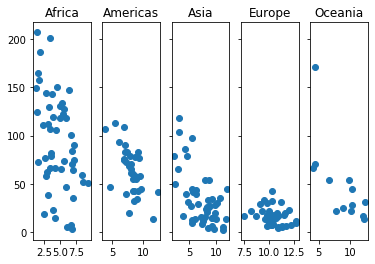

In [33]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
        
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

grouped_scatterplot(df, 'school', 'adfert', 'region')

### Refactorización grouped_scatterplot

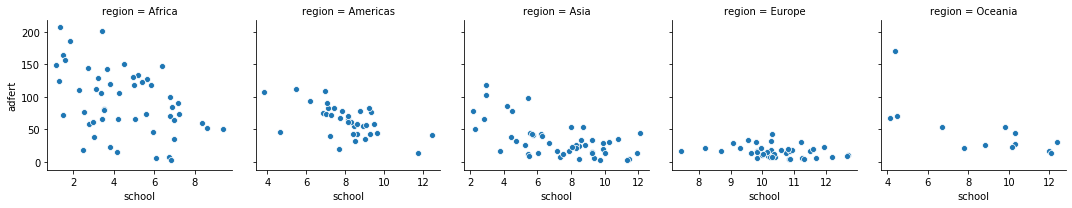

In [36]:
def grouped_scatterplot(dataframe, x, y, group_by):
     
    grid = sns.FacetGrid(dataframe, col=group_by, sharex=False,)
    grid = grid.map(sns.scatterplot,x,y)

    
grouped_scatterplot(df, 'school', 'adfert', 'region')

## Ejercicio 3: Genere un heatmap entre todas las variables.
* En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

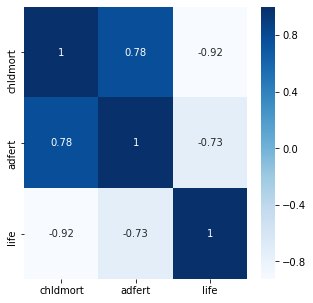

In [39]:
df_var = ['chldmort','adfert','life']
df_filtrado = df.loc[:, df_var]

#df_filtrado.head()

plt.figure(figsize=(5,5))
sns.heatmap(df_filtrado.corr(), cmap='Blues', annot=True);

Comentario: Para los datos y variables seleccionadas, todas presentan niveles de correlación fuerte. Para el caso de la variable "life", esta presenta una correlación negativa, lo que nos indica una correlacionan en sentido inverso.A valores altos de una de ellas le suelen corresponder valor bajos de la otra y viceversa.


## Ejercicio 4: En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones
* _tip_: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = `df.loc[:,['variables', 'a', 'agregar']]`. No olvide agregar la variable `region`.
* _tip_: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.

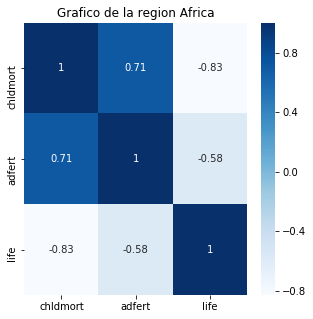

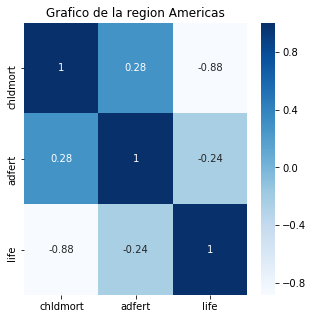

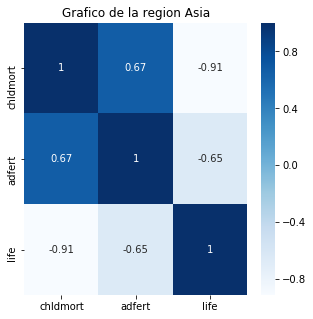

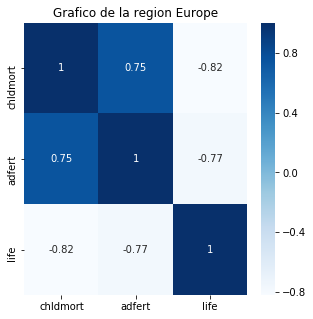

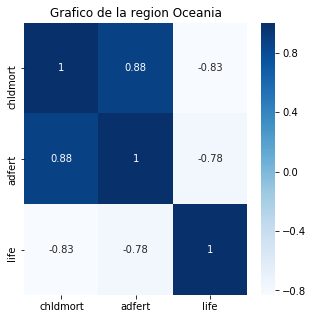

In [23]:
df_var_1 = ['chldmort','adfert','life','region']
tmp= df.loc[:, df_var_1]

region_by = tmp['region'].unique()

for n in region_by:
    tmp_group_plt = tmp[tmp['region'] == n]
    plt.figure(figsize=(5,5))
    plt.title('Grafico de la region {}'.format(n))
    sns.heatmap(tmp_group_plt.corr(), cmap='Blues', annot=True)
